In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aszNzqpyyqoGBK5MREHi")
project = rf.workspace("thrisha").project("barcodedetection-f2sk1")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BarCodeDetection-1 in yolov8:: 100%|██████████| 1500/1500 [00:00<00:00, 2411.25it/s]


In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

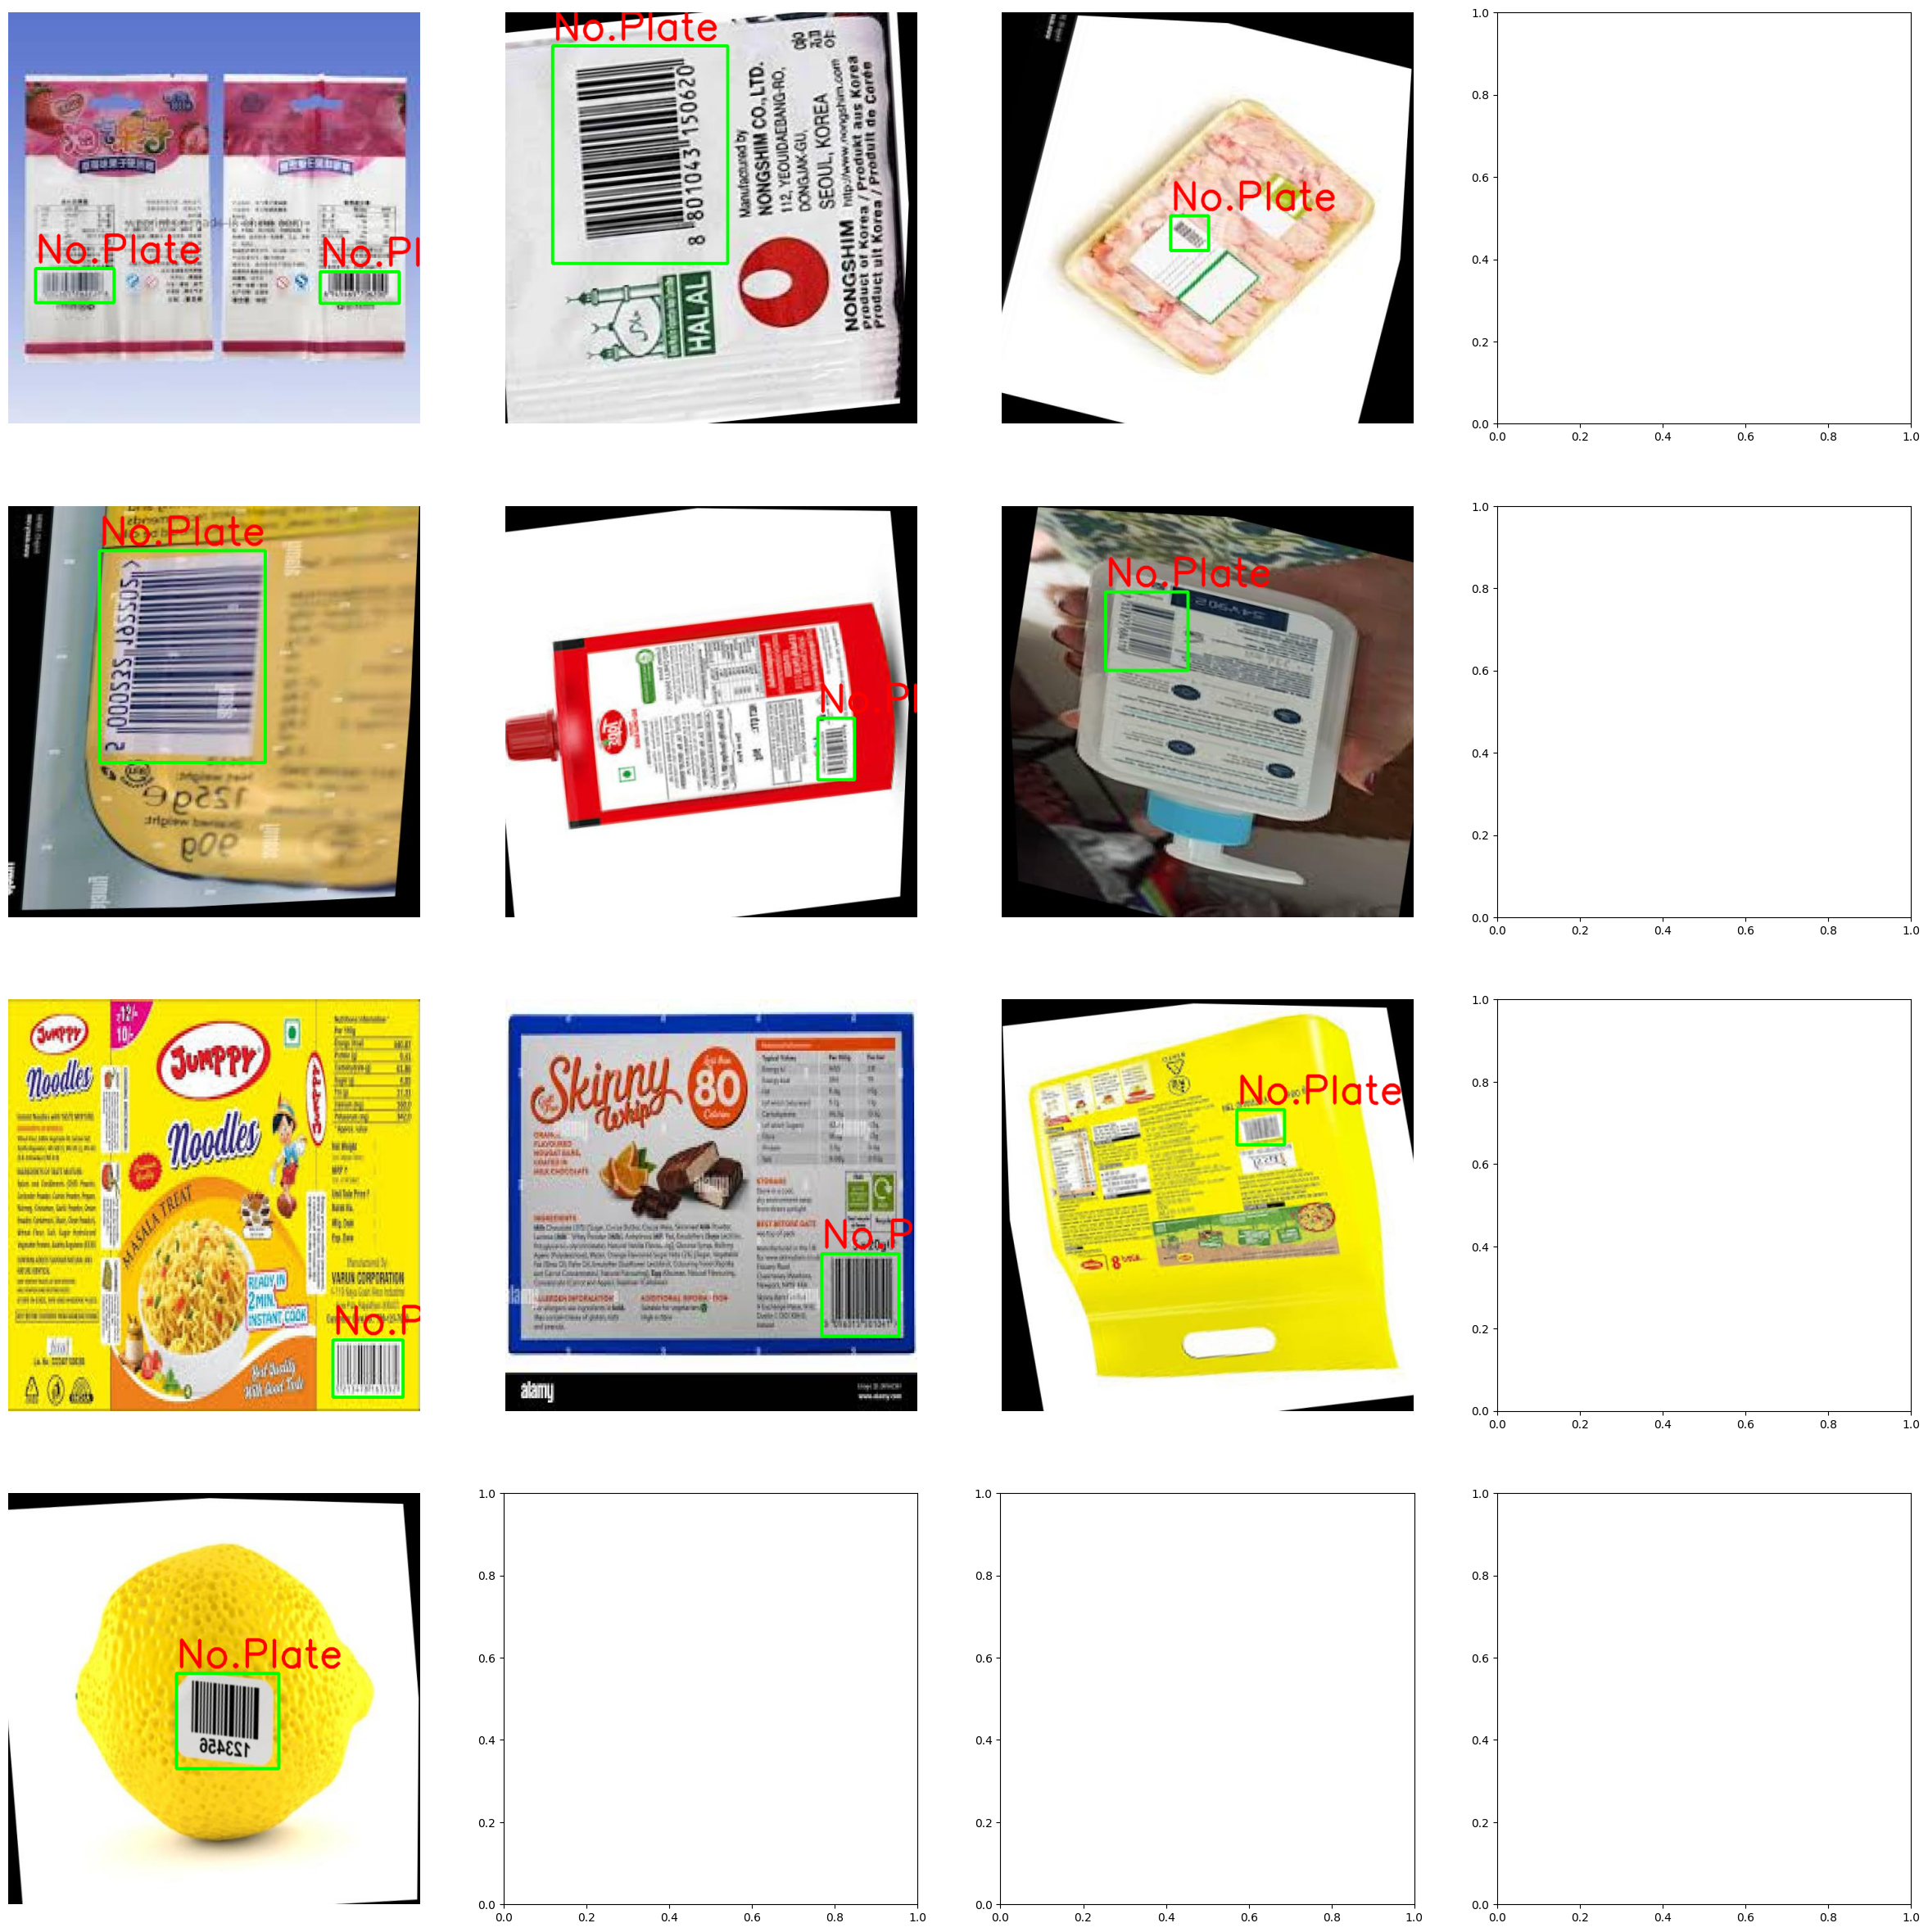

In [ ]:
img_dir = "/content/BarCodeDetection-1/train/images"
label_dir = "/content/BarCodeDetection-1/train/labels"

img_files = os.listdir(img_dir)
ran_img = random.sample(img_files, 10)

fig, axs = plt.subplots(4, 4, figsize=(30,30))

for i, image_file in enumerate(ran_img):
    row = i // 3
    col = i % 3
    image_path = os.path.join(img_dir, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(label_path):
        print(f"Label file not found for {image_file}")
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        continue

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
        cv2.putText(image, "No.Plate" , (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0 , 255), 3, cv2.LINE_AA)

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
# Install the ultralytics package from PyPI
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 25.7 MB/s eta 0:00:00


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/BarCodeDetection-1/data.yaml epochs=60 imgsz=640 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 95.0MB/s]
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/BarCodeDetection-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=Fa

In [ ]:
from IPython.display import Image

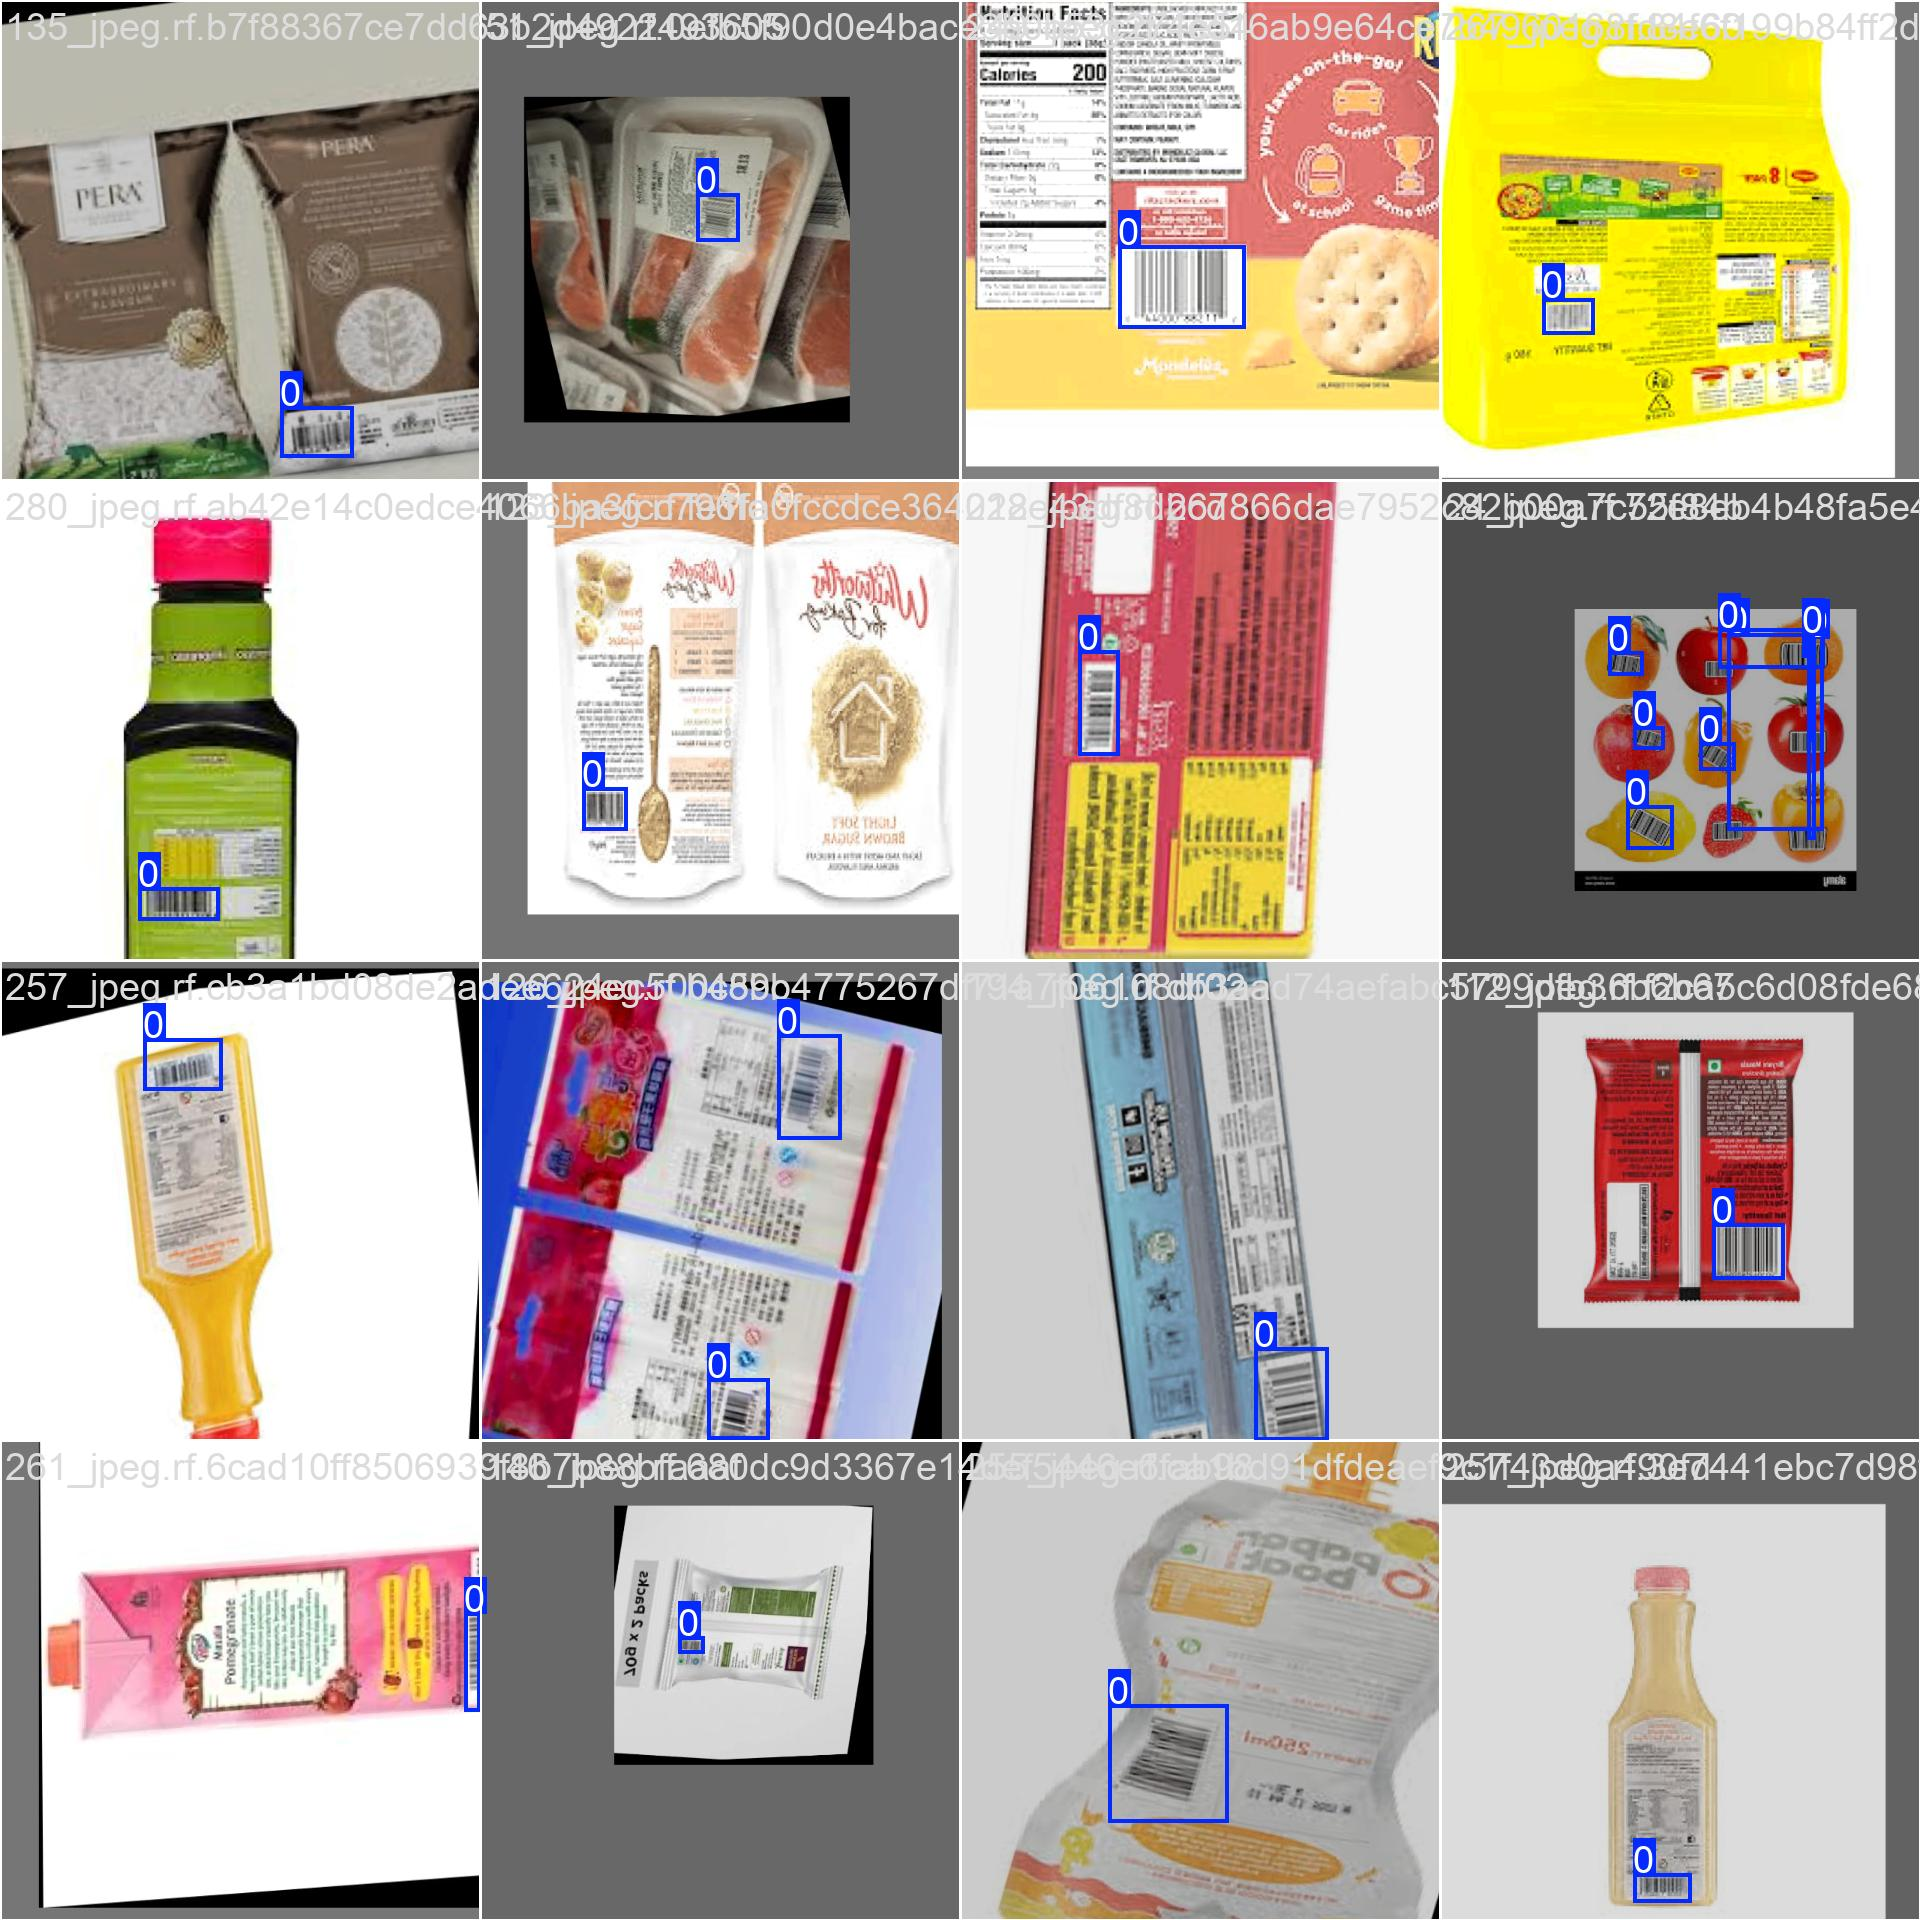

In [ ]:
Image(filename="/content/runs/detect/train/train_batch2050.jpg",width=500)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/BarCodeDetection-1/data.yaml

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/BarCodeDetection-1/valid/labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100% 62/62 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 74. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.53it/s]
                   all         62         74      0.954      0.892      0.911      0.671
Speed: 3.0ms preprocess, 13.3ms inference, 0.0ms loss, 13.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


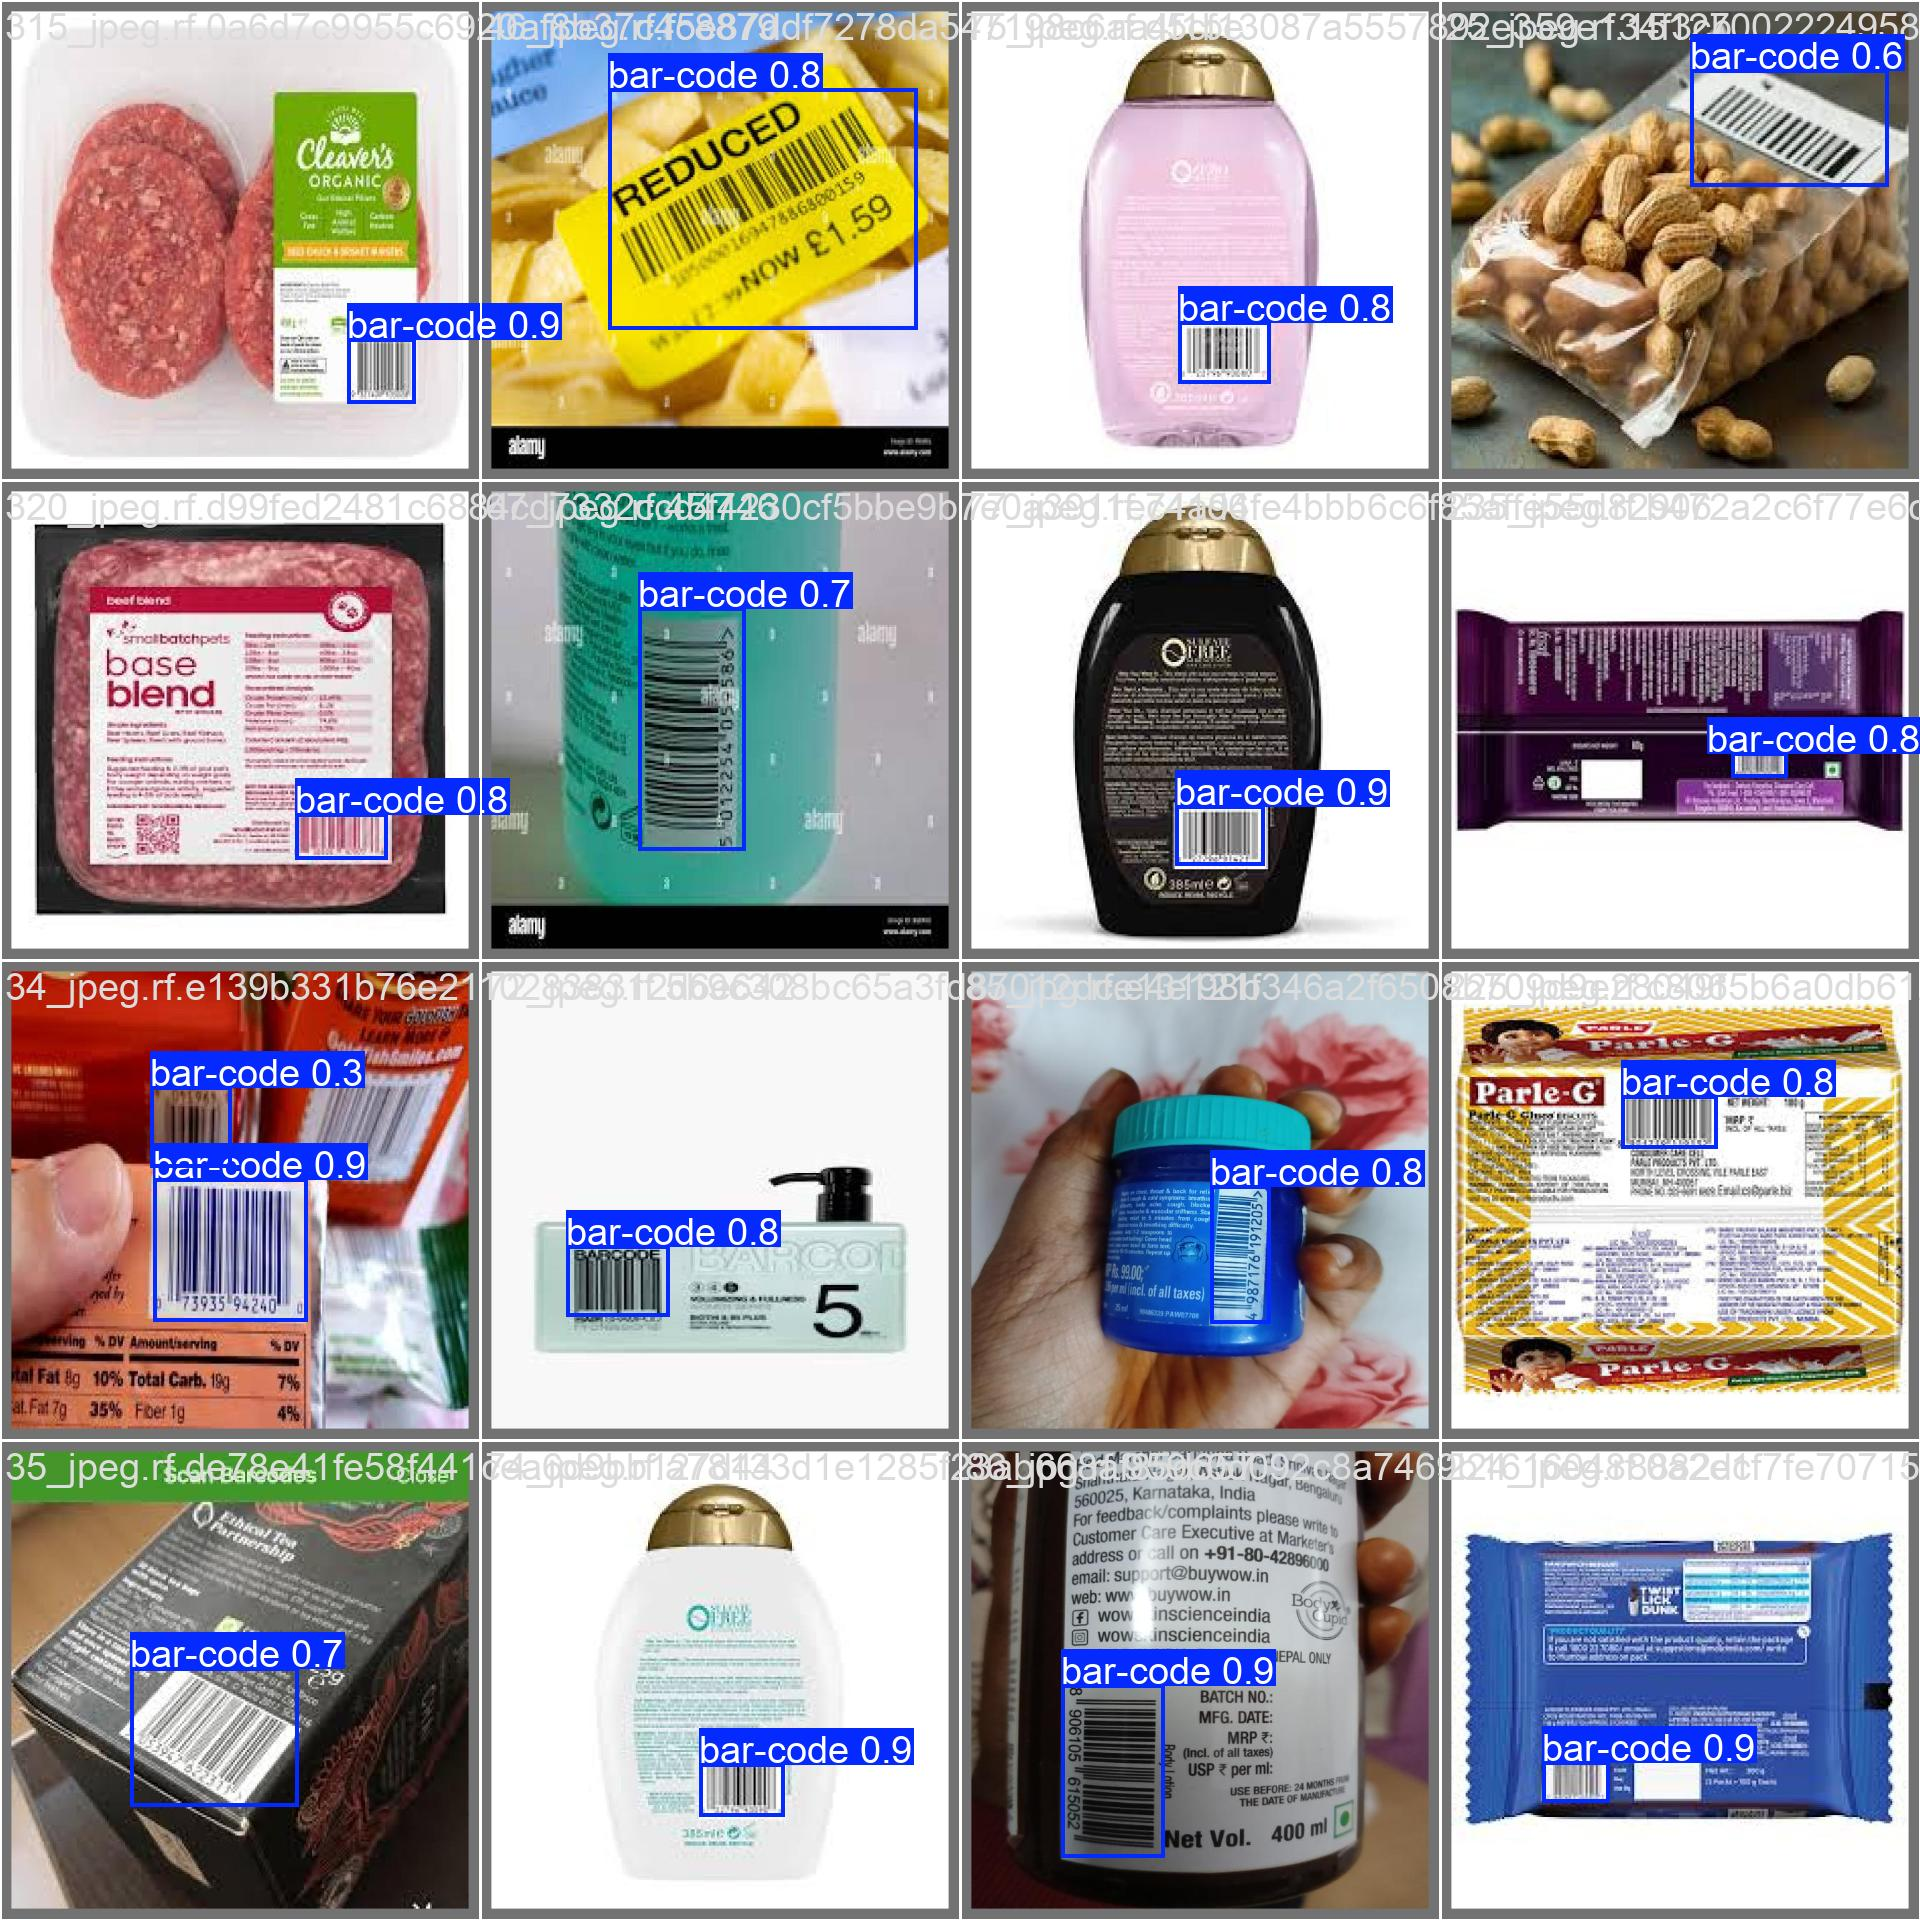

In [ ]:
Image(filename="/content/runs/detect/val/val_batch1_pred.jpg")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/BarCodeDetection-1/test/images save=True

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/31 /content/BarCodeDetection-1/test/images/121_jpeg.rf.faf135e504c6d56d50daea287571846f.jpg: 640x640 1 bar-code, 20.7ms
image 2/31 /content/BarCodeDetection-1/test/images/124_jpeg.rf.6344a182d77423c16e8179f8db3cd827.jpg: 640x640 1 bar-code, 12.0ms
image 3/31 /content/BarCodeDetection-1/test/images/125_jpeg.rf.4b5435be41262f90f3776bfb66062384.jpg: 640x640 1 bar-code, 8.8ms
image 4/31 /content/BarCodeDetection-1/test/images/139_jpeg.rf.e50fcc19536436db6573af3e7cbcae81.jpg: 640x640 1 bar-code, 8.5ms
image 5/31 /content/BarCodeDetection-1/test/images/13_jpeg.rf.f3a52d515acdf4cb45e424d24aaa1a2f.jpg: 640x640 1 bar-code, 8.5ms
image 6/31 /content/BarCodeDetection-1/test/images/149_jpeg.rf.97ac9b0a54ed58a11146b5cc18793a33.jpg: 640x640 2 bar-codes, 8.6ms
image 7/31 /content/BarCodeDetection-1/test/images/154_jpeg.rf.99287845b

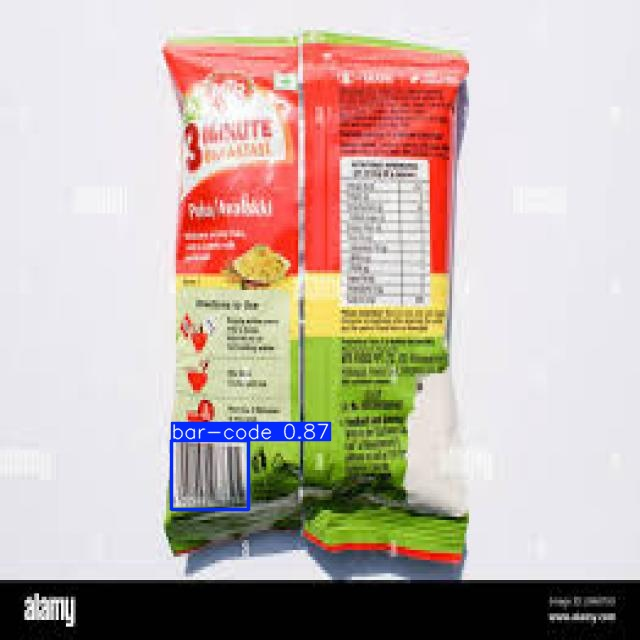

In [ ]:
Image(filename="/content/runs/detect/predict/139_jpeg.rf.e50fcc19536436db6573af3e7cbcae81.jpg")

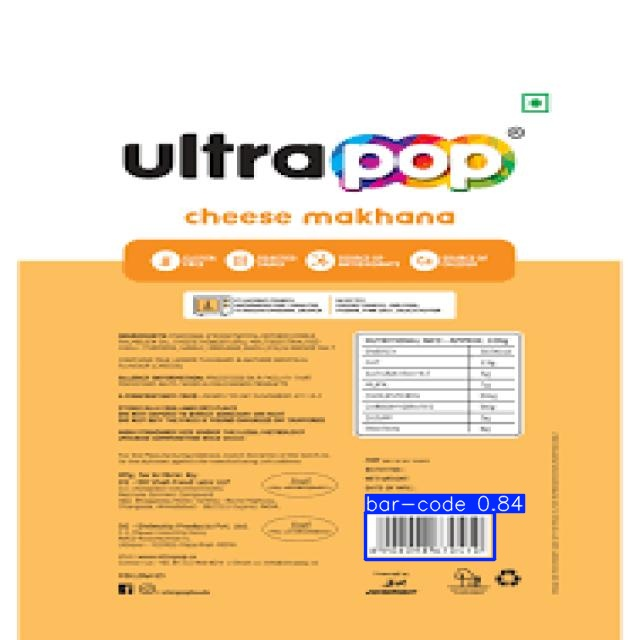

In [ ]:
Image(filename="/content/runs/detect/predict/247_png.rf.f25199590b2a5280748e1df89ec88cb1.jpg")

In [ ]:
from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.50 source=/content/b2.jpg save=True

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/b2.jpg: 640x640 2 bar-codes, 14.6ms
Speed: 11.2ms preprocess, 14.6ms inference, 1087.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


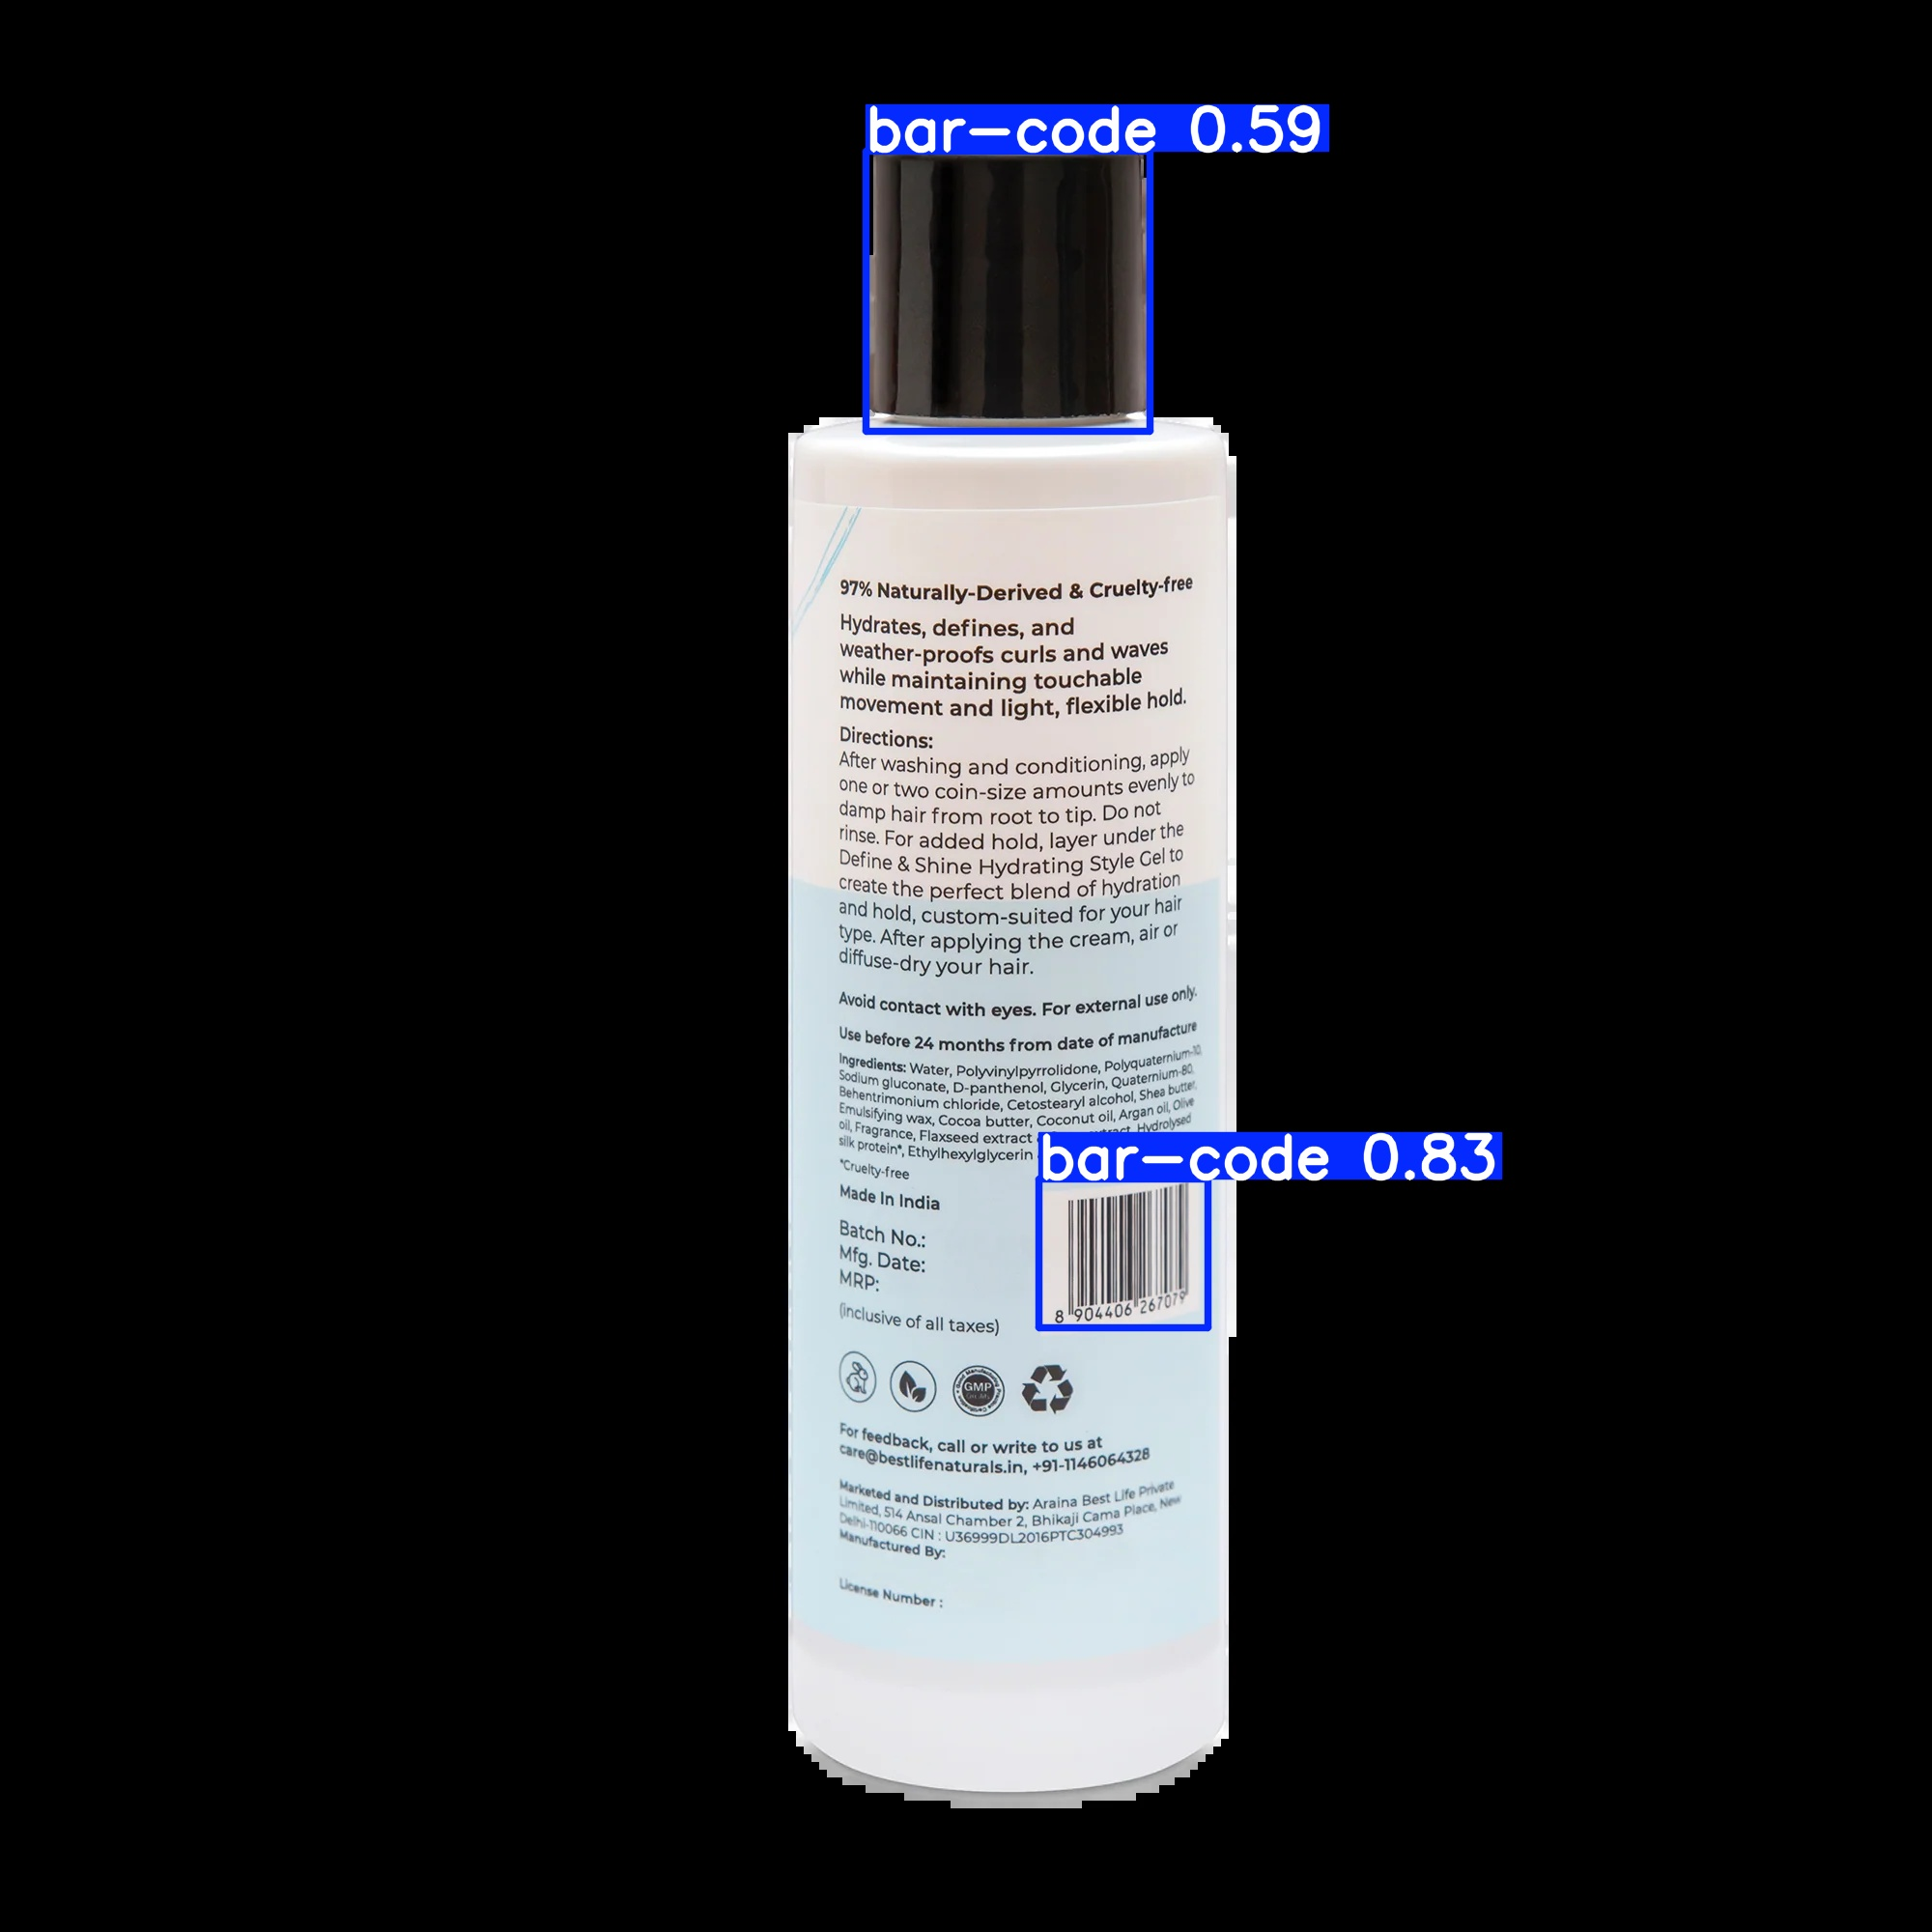

In [ ]:
Image(filename="/content/runs/detect/predict3/b2.jpg")